In [1]:
import numpy as np
import pandas as pd

In [15]:
loan_data = pd.read_csv("data/loandata.csv")
loan_data.head()

,loan_amnt,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,open_acc,total_pymnt,total_rec_int
0,5000.0,B,B2,10+ years,RENT,24000.0,2017/12/11,Fully Paid,3,5863.155187,863.16
1,2500.0,C,C4,< 1 year,RENT,30000.0,2017/12/11,Charged Off,3,1014.530000,435.17
2,12500.0,D,D4,10+ years,RENT,74400.0,2017/11/11,Fully Paid,8,14722.411910,2222.41
3,14000.0,A,A4,10+ years,RENT,72000.0,2017/11/11,fully Paid,6,15099.982530,1099.98
4,35000.0,F,F5,4 years,MORTGAGE,100000.0,2017/10/11,Fully Paid,9,48743.119270,13743.12


In [3]:
# seaborn 是基于matplotlib的 所以需要先导入matplotlib 包
import matplotlib.pyplot as plt
import seaborn as sns # 导入seaborn包

In [4]:
# 初始化画图参数
sns.set_context("notebook",font_scale=1.3) # notebook格式，放大横纵坐标标记
sns.set_palette('Set2') # 配色使用Set2  
# 内嵌模式
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # retina高清显示

In [7]:
# 处理数据丢失的空值
loan_data.dropna(inplace=True) # 丢掉缺失值所在行
loan_data.drop(loan_data[loan_data['annual_inc']>500000].index,inplace=True)# 去掉annual_inc其中一个离群值绘图
loan_data.drop(loan_data[loan_data['loan_amnt']>400000].index,inplace=True)# 去掉离群值绘图
loan_numerical = loan_data.drop(loan_data.select_dtypes(include=['object']).columns,axis=1) # 数值型dataframe

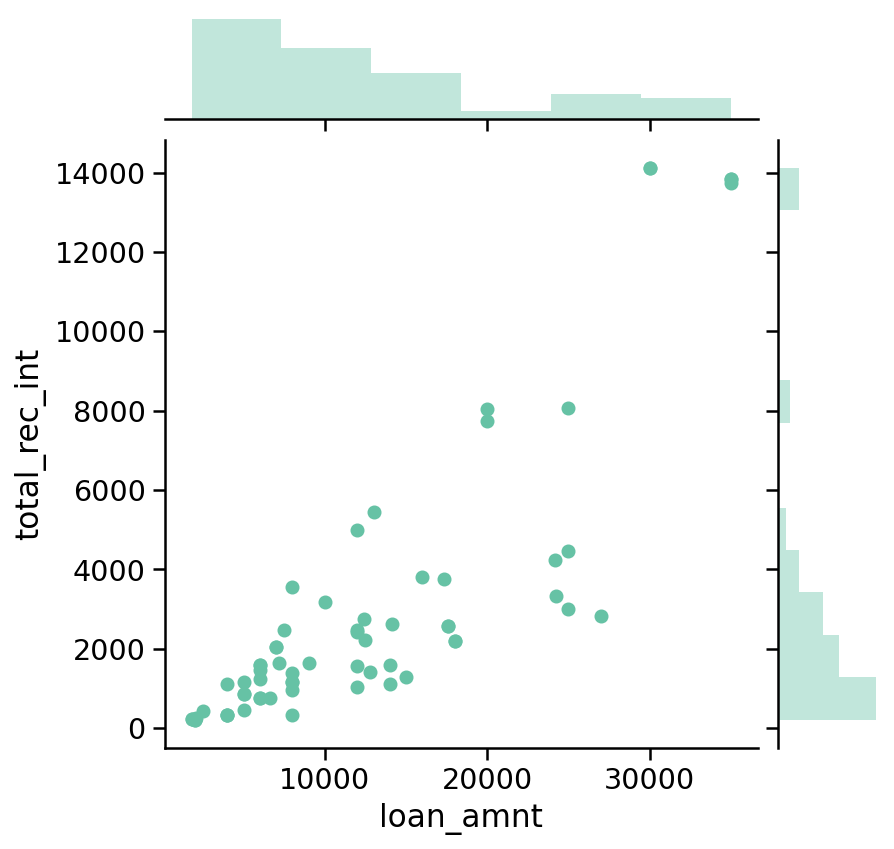

In [19]:
# jointplot 绘制散点图
sns.jointplot(x="loan_amnt", y="total_rec_int", data=loan_data)  


<AxesSubplot:xlabel='loan_amnt'>

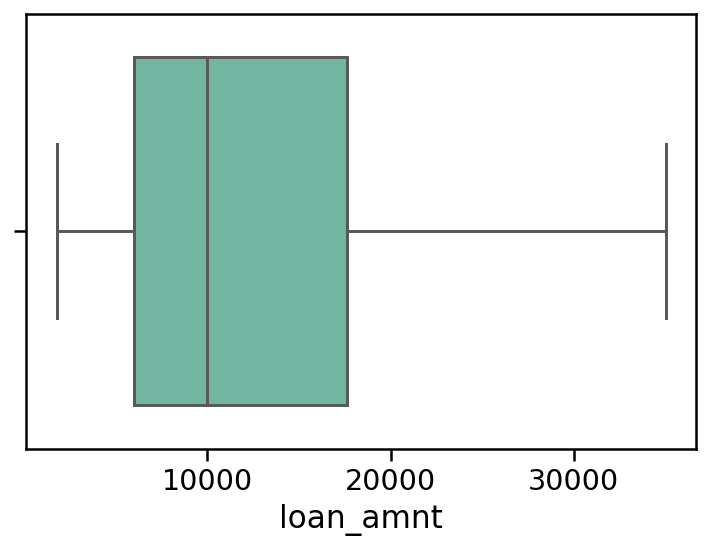

In [16]:
# 盒图
# 可以帮助我们快速的分析数据的离散情况，找到离群点
sns.boxplot(loan_data['loan_amnt'])

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

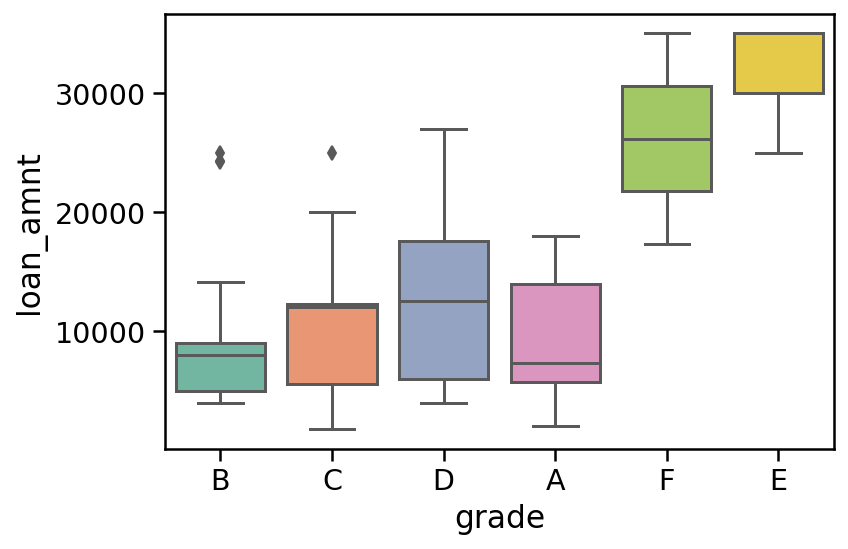

In [18]:
# 首先会对x列进行分组
# 再根据每组的数据绘制盒图
sns.boxplot(x='grade',y='loan_amnt',data = loan_data)

<AxesSubplot:xlabel='loan_amnt'>

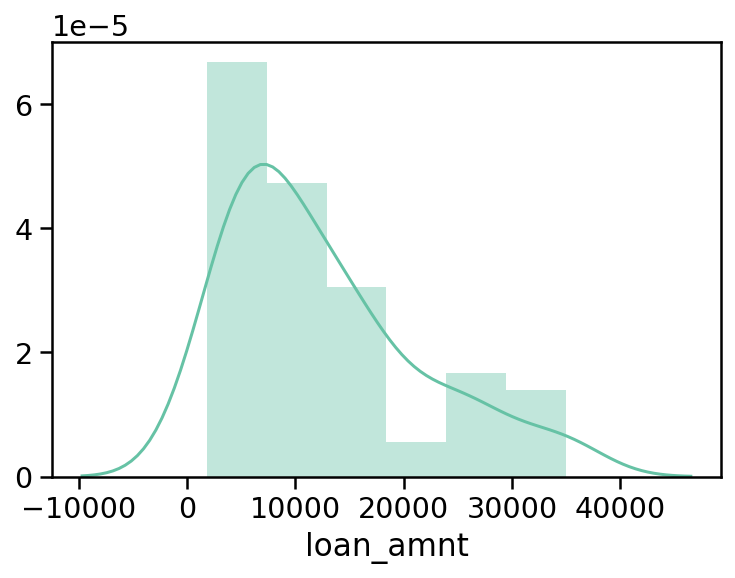

In [22]:
# 直方图 可以清楚 显示各组频数分布情况
sns.distplot(loan_data['loan_amnt'])


<AxesSubplot:ylabel='loan_amnt'>

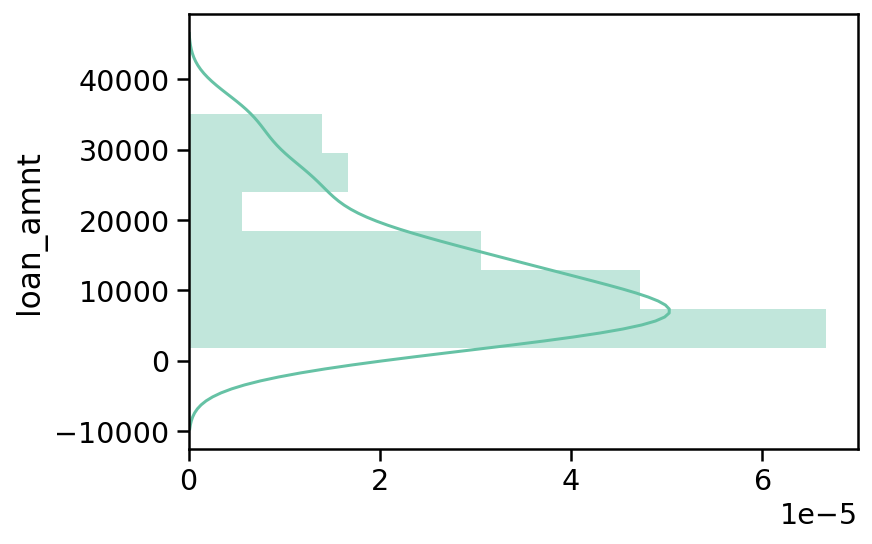

In [23]:
# 水平绘制 直方图
sns.distplot(loan_data['loan_amnt'],vertical=True)

<AxesSubplot:xlabel='grade', ylabel='count'>

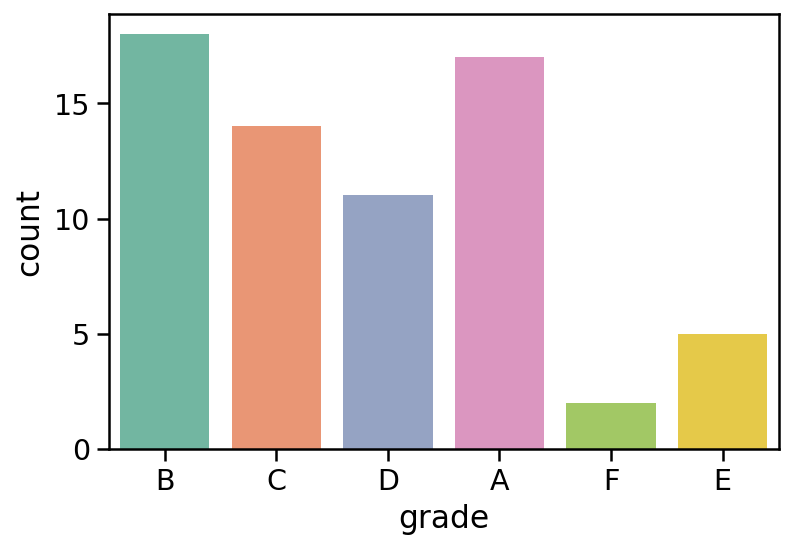

In [26]:
# 柱状图
sns.countplot(x="grade", data=loan_data)